Project Objective

The aim of this project is to build a machine learning model  to predict
the total daily air traffic in the United States. The idea is to provide
valuable insights into air traffic trends and improve forecasting accuracy. As a data scientist, you will first analyse the data to see if there are features in the data set that influence the the total air traffic in the United States.

# **Import Basic Exploration And Visualization Libraries**

import numpy as np import pandas as pd import scipy.stats as stats import matplotlib.pyplot as plt import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Air_Traffic_Data = pd. read_csv('/content/Air Traffic Data.csv')
Air_Traffic_Data

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,04/01/2009,2009,4,10397,ATL,34,16321,ZRH,486,19790,DL,1,Departures,54,0,54
2,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
3,02/01/2005,2005,2,11057,CLT,36,14849,SKB,275,20355,US,1,Departures,8,0,8
4,01/01/2004,2004,1,12478,JFK,22,11625,EZE,303,19535,AR,0,Departures,30,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051287,12/01/2022,2022,12,99999,ZZZ,1,10916,CCZ,204,21743,2LQ,1,Departures,0,1,1
1051288,12/01/2022,2022,12,99999,ZZZ,1,13289,MHH,204,21743,2LQ,1,Departures,0,2,2
1051289,12/01/2022,2022,12,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Departures,0,6,6
1051290,12/01/2022,2022,12,99999,ZZZ,1,13746,NSB,204,21743,2LQ,1,Departures,0,1,1


In [3]:
Air_Traffic_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051292 entries, 0 to 1051291
Data columns (total 16 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   data_dte      1051292 non-null  object
 1   Year          1051292 non-null  int64 
 2   Month         1051292 non-null  int64 
 3   usg_apt_id    1051292 non-null  int64 
 4   usg_apt       1051292 non-null  object
 5   usg_wac       1051292 non-null  int64 
 6   fg_apt_id     1051292 non-null  int64 
 7   fg_apt        1051292 non-null  object
 8   fg_wac        1051292 non-null  int64 
 9   airlineid     1051292 non-null  int64 
 10  carrier       1048237 non-null  object
 11  carriergroup  1051292 non-null  int64 
 12  type          1051292 non-null  object
 13  Scheduled     1051292 non-null  int64 
 14  Charter       1051292 non-null  int64 
 15  Total         1051292 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 128.3+ MB


In [4]:
#number of missing values
Air_Traffic_Data.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [5]:
for column in Air_Traffic_Data.columns:
    if Air_Traffic_Data[column].dtype == "object":
        print(column)

data_dte
usg_apt
fg_apt
carrier
type


In [6]:
Air_Traffic_Data.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [7]:
Air_Traffic_Data.shape

(1051292, 16)

In [8]:
Air_Traffic_Data["data_dte"].unique()

array(['05/01/2006', '04/01/2009', '05/01/2003', '02/01/2005',
       '01/01/2004', '07/01/2005', '01/01/2005', '08/01/2009',
       '08/01/2001', '03/01/2007', '03/01/2010', '01/01/2001',
       '07/01/2008', '12/01/2004', '04/01/2006', '12/01/2010',
       '05/01/2009', '07/01/2007', '05/01/2002', '04/01/2005',
       '07/01/2001', '10/01/2007', '09/01/2006', '11/01/2010',
       '08/01/2006', '08/01/2008', '11/01/2006', '02/01/2002',
       '02/01/2008', '11/01/2001', '10/01/2008', '12/01/2006',
       '07/01/2003', '11/01/2009', '10/01/2002', '09/01/2008',
       '11/01/2004', '10/01/2001', '06/01/2002', '12/01/2008',
       '10/01/2006', '06/01/2007', '04/01/2008', '07/01/2009',
       '10/01/2004', '01/01/2002', '05/01/2001', '04/01/2004',
       '09/01/2003', '02/01/2001', '02/01/2009', '09/01/2005',
       '04/01/2007', '08/01/2010', '09/01/2004', '11/01/2005',
       '12/01/2001', '06/01/2005', '12/01/2003', '05/01/2010',
       '09/01/2002', '01/01/2009', '01/01/2003', '06/01

In [9]:
Air_Traffic_Data['usg_apt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1051292 entries, 0 to 1051291
Series name: usg_apt
Non-Null Count    Dtype 
--------------    ----- 
1051292 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [10]:
Air_Traffic_Data["usg_apt"].unique()

array(['GUM', 'ATL', 'ANC', ..., 'JXN', 'HEZ', 'TSM'], dtype=object)

In [11]:
Air_Traffic_Data['fg_apt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1051292 entries, 0 to 1051291
Series name: fg_apt
Non-Null Count    Dtype 
--------------    ----- 
1051292 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [12]:
Air_Traffic_Data["fg_apt"].unique()

array(['MAJ', 'ZRH', 'OKO', ..., 'LEN', 'GBE', 'PED'], dtype=object)

In [13]:
Air_Traffic_Data["type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1051292 entries, 0 to 1051291
Series name: type
Non-Null Count    Dtype 
--------------    ----- 
1051292 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [14]:
Air_Traffic_Data["type"].unique()

array(['Departures'], dtype=object)

In [15]:
Air_Traffic_Data["carrier"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1051292 entries, 0 to 1051291
Series name: carrier
Non-Null Count    Dtype 
--------------    ----- 
1048237 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [16]:
Air_Traffic_Data["carrier"].unique()

array(['PFQ', 'DL', '5Y', 'US', 'AR', 'LR', 'LA', 'LH', 'GL', 'FI', '4M',
       'VB', 'AMQ', 'AC', 'CO', '5L', 'WI', 'QK', 'GR', 'JN', 'AS', 'AA',
       'UA', 'JM', 'PK', 'MMQ', '3K', 'NK', 'U5', 'XL', 'MP', 'GFQ', 'M3',
       'SU', 'CS', 'AM', 'MX', 'L2', '5X', 'OZ', '3M', 'OW', 'AF', 'MQ',
       'LY', 'PO', 'XE', 'TZ', 'VS', 'NZ', 'OO', 'WO', 'EZ', 'HP', 'SA',
       'MY', nan, 'DE', 'VSA', 'CV', 'T9', 'AUQ', 'HA', 'YV', 'JR', 'KAQ',
       'IW', 'BA', 'LT', 'M6', 'EI', 'KU', 'KE', 'B6', 'AZ', 'FX', '9S',
       '9E', 'OH', 'GG', 'RU', 'WAP', 'SV', 'PR', 'SLQ', 'C6', 'XP', 'U7',
       'PCQ', 'OS', 'MU', '13Q', 'S5', 'LO', 'CI', 'PRQ', 'TRA', 'F8',
       'JJ', 'JL', 'ABX', 'ZW', 'NW', 'E9', 'EUQ', 'PN', 'JW', 'WS',
       'KAH', '5D', 'RYQ', 'AT', '6B', 'PT', 'MG', 'ZE', 'XJ', '2K',
       'VPJ', '9L', 'RD', 'LX', '6A', 'A0', 'CC', 'QX', 'POQ', 'EV', 'F9',
       'ZQ', 'RNQ', 'A2', 'AV', 'RG', 'OP', 'DHQ', 'UP', 'PLQ', 'XG',
       'BR', 'LP', 'CA', 'TS', 'SVW', 'TP', 'SY', 'TA'

In [17]:
Air_Traffic_Data.describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,1.051292e+06,1.051292e+06,1.051292e+06,1.051292e+06,1.051292e+06,1.051292e+06,1.051292e+06,1.051292e+06,1.051292e+06,1.051292e+06,1.051292e+06
mean,2.007825e+03,6.419949e+00,1.282699e+04,4.280084e+01,1.348378e+04,4.652742e+02,2.009986e+04,5.952790e-01,3.912132e+01,2.045327e+00,4.116665e+01
std,9.491233e+00,3.452523e+00,3.033691e+03,2.764451e+01,1.930226e+03,2.873688e+02,5.360781e+02,4.908382e-01,5.985403e+01,8.482727e+00,5.930088e+01
min,1.990000e+03,1.000000e+00,1.001000e+04,1.000000e+00,1.011900e+04,1.060000e+02,1.938600e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+03,3.000000e+00,1.161800e+04,2.200000e+01,1.186800e+04,2.040000e+02,1.974500e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,2.008000e+03,6.000000e+00,1.289200e+04,3.300000e+01,1.340800e+04,4.270000e+02,2.000700e+04,1.000000e+00,1.600000e+01,0.000000e+00,1.900000e+01
75%,2.016000e+03,9.000000e+00,1.348700e+04,7.400000e+01,1.505800e+04,7.360000e+02,2.035500e+04,1.000000e+00,6.000000e+01,1.000000e+00,6.000000e+01
max,2.023000e+03,1.200000e+01,9.999900e+04,9.300000e+01,1.699700e+04,9.750000e+02,2.212400e+04,1.000000e+00,2.019000e+03,1.092000e+03,2.019000e+03


In [18]:
# Describe object data_type
Air_Traffic_Data.describe(include=object)

,data_dte,usg_apt,fg_apt,carrier,type
count,1051292,1051292,1051292,1048237,1051292
unique,405,1085,1764,771,1
top,06/01/2023,MIA,YYZ,AA,Departures
freq,3739,147887,56347,67187,1051292


# **# Data visualization**

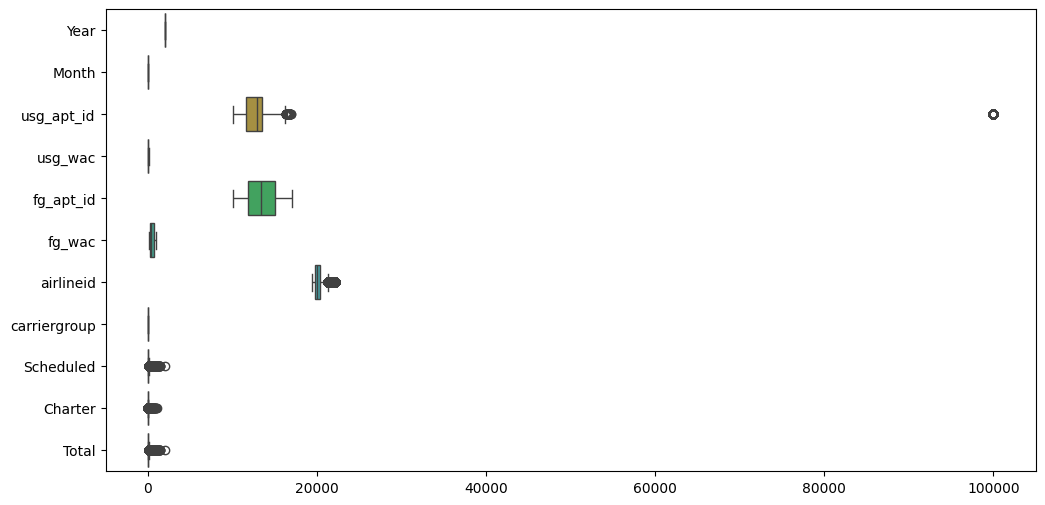

In [19]:
#Boxplots to check for outliers

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(data=Air_Traffic_Data, ax=ax, orient='h')

plt.show()

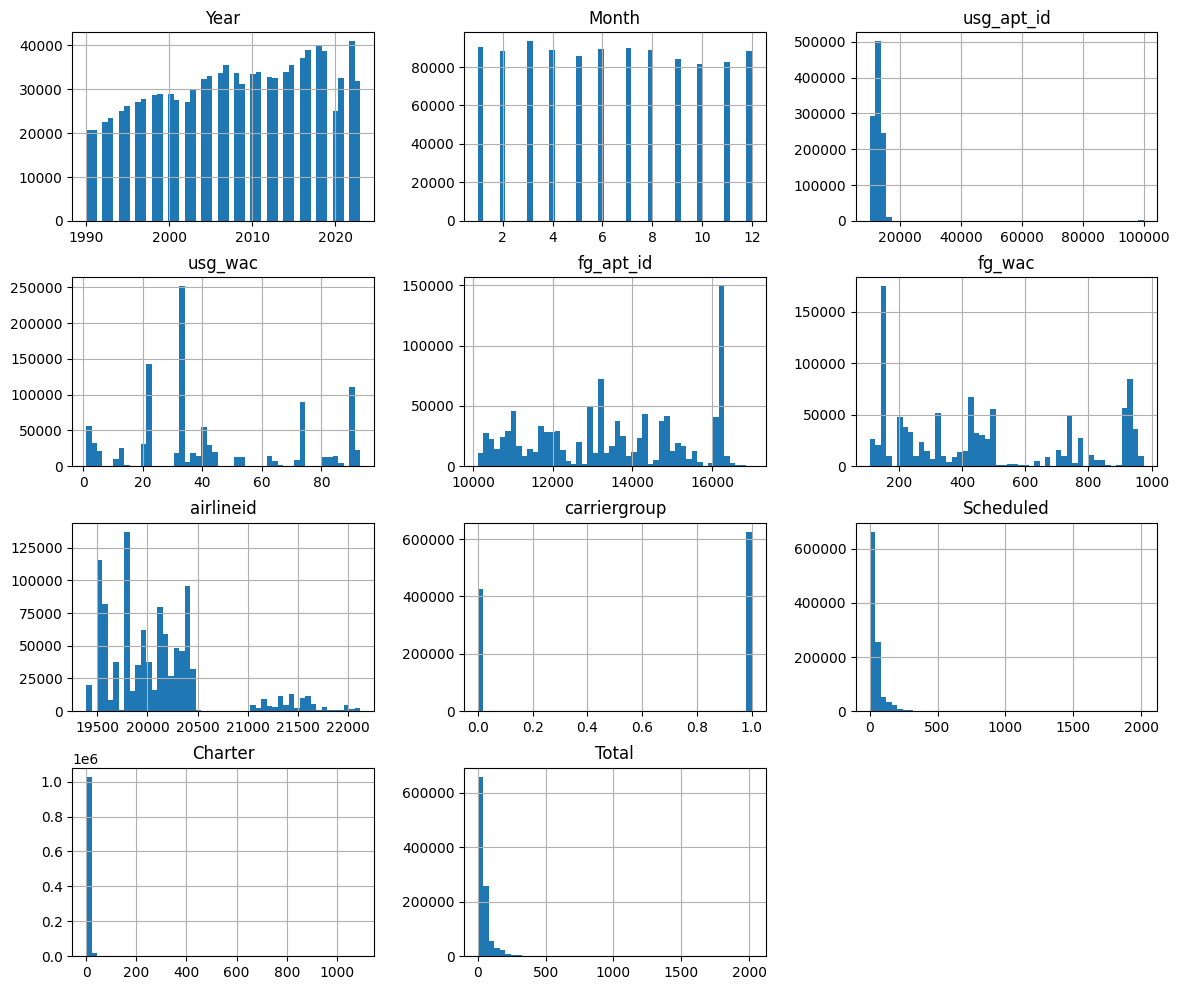

In [20]:
# Distribution plot
Air_Traffic_Data.hist(figsize=(14, 12), bins=50);

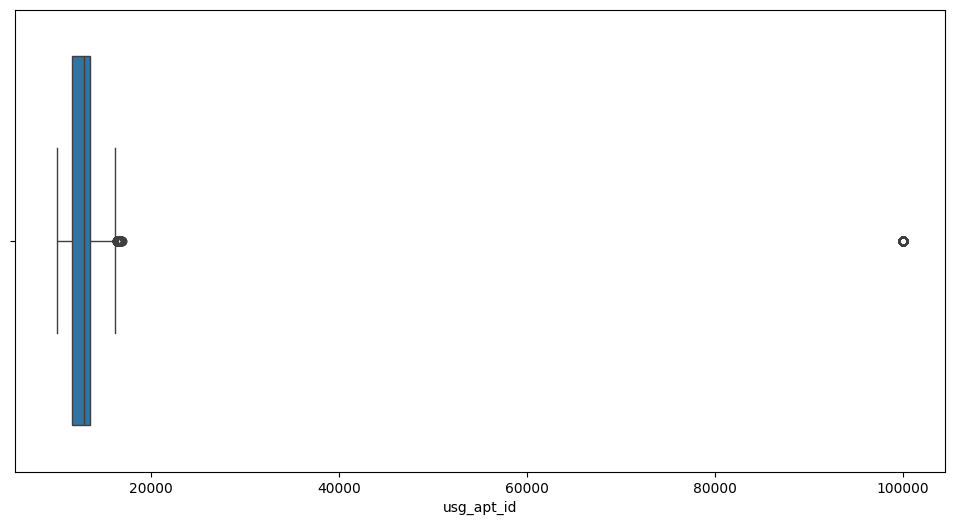

In [21]:
# Boxplots to check for outliers

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(data=Air_Traffic_Data['usg_apt_id'], ax=ax, orient='h')

plt.show()

In [22]:
Air_Traffic_Data.loc[Air_Traffic_Data['usg_apt_id'].idxmax()]

data_dte        09/01/2007
Year                  2007
Month                    9
usg_apt_id           99999
usg_apt                ZZZ
usg_wac                  1
fg_apt_id            13602
fg_apt                 NAN
fg_wac                 821
airlineid            19874
carrier                 8C
carriergroup             1
type            Departures
Scheduled                0
Charter                  3
Total                    3
Name: 1403, dtype: object

In [23]:
Air_Traffic_Data.drop(columns=['usg_apt_id'], inplace=True)


In [24]:
Air_Traffic_Data.drop(columns=['data_dte'], inplace=True)

In [25]:
Air_Traffic_Data.head()

,Year,Month,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,2006,5,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,2009,4,ATL,34,16321,ZRH,486,19790,DL,1,Departures,54,0,54
2,2003,5,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
3,2005,2,CLT,36,14849,SKB,275,20355,US,1,Departures,8,0,8
4,2004,1,JFK,22,11625,EZE,303,19535,AR,0,Departures,30,0,30


# **Categorical Data Encoding**

There are 2 major methods of encoding categorical data in ML.However,there are other methods as they are specifically for Natural Language Processing tasks.

These two methods are:
1: Label-Encoding.

2: One Hot-Encoding.

 I will however,be using LabelEncoding to convert the textual data into numerical data type as our dataset is of Regression Categorical Data.

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Air_Traffic_Data["usg_apt_encoded"] = encoder.fit_transform(Air_Traffic_Data["usg_apt"])

# Displaying the encoded information
print(Air_Traffic_Data["usg_apt_encoded"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 1051292 entries, 0 to 1051291
Series name: usg_apt_encoded
Non-Null Count    Dtype
--------------    -----
1051292 non-null  int64
dtypes: int64(1)
memory usage: 8.0 MB
None


In [27]:
Air_Traffic_Data.head()

,Year,Month,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total,usg_apt_encoded
0,2006,5,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10,385
1,2009,4,ATL,34,16321,ZRH,486,19790,DL,1,Departures,54,0,54,61
2,2003,5,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15,39
3,2005,2,CLT,36,14849,SKB,275,20355,US,1,Departures,8,0,8,180
4,2004,1,JFK,22,11625,EZE,303,19535,AR,0,Departures,30,0,30,478


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Air_Traffic_Data["fg_apt_encoded"] = encoder.fit_transform(Air_Traffic_Data["fg_apt"])

# Displaying the encoded information
print(Air_Traffic_Data["fg_apt_encoded"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 1051292 entries, 0 to 1051291
Series name: fg_apt_encoded
Non-Null Count    Dtype
--------------    -----
1051292 non-null  int64
dtypes: int64(1)
memory usage: 8.0 MB
None


In [29]:
Air_Traffic_Data.head()

,Year,Month,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total,usg_apt_encoded,fg_apt_encoded
0,2006,5,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10,385,835
1,2009,4,ATL,34,16321,ZRH,486,19790,DL,1,Departures,54,0,54,61,1755
2,2003,5,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15,39,1038
3,2005,2,CLT,36,14849,SKB,275,20355,US,1,Departures,8,0,8,180,1291
4,2004,1,JFK,22,11625,EZE,303,19535,AR,0,Departures,30,0,30,478,457


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Air_Traffic_Data["carrier_encoded"] = encoder.fit_transform(Air_Traffic_Data["carrier"])

# Displaying the encoded information
print(Air_Traffic_Data["carrier_encoded"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 1051292 entries, 0 to 1051291
Series name: carrier_encoded
Non-Null Count    Dtype
--------------    -----
1051292 non-null  int64
dtypes: int64(1)
memory usage: 8.0 MB
None


In [31]:
Air_Traffic_Data.head()

,Year,Month,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total,usg_apt_encoded,fg_apt_encoded,carrier_encoded
0,2006,5,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10,385,835,536
1,2009,4,ATL,34,16321,ZRH,486,19790,DL,1,Departures,54,0,54,61,1755,246
2,2003,5,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15,39,1038,94
3,2005,2,CLT,36,14849,SKB,275,20355,US,1,Departures,8,0,8,180,1291,680
4,2004,1,JFK,22,11625,EZE,303,19535,AR,0,Departures,30,0,30,478,457,162


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Air_Traffic_Data["type_encoded"] = encoder.fit_transform(Air_Traffic_Data["type"])

# Displaying the encoded information
print(Air_Traffic_Data["type_encoded"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 1051292 entries, 0 to 1051291
Series name: type_encoded
Non-Null Count    Dtype
--------------    -----
1051292 non-null  int64
dtypes: int64(1)
memory usage: 8.0 MB
None


In [33]:
Air_Traffic_Data.head()

,Year,Month,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total,usg_apt_encoded,fg_apt_encoded,carrier_encoded,type_encoded
0,2006,5,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10,385,835,536,0
1,2009,4,ATL,34,16321,ZRH,486,19790,DL,1,Departures,54,0,54,61,1755,246,0
2,2003,5,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15,39,1038,94,0
3,2005,2,CLT,36,14849,SKB,275,20355,US,1,Departures,8,0,8,180,1291,680,0
4,2004,1,JFK,22,11625,EZE,303,19535,AR,0,Departures,30,0,30,478,457,162,0


In [34]:
Air_Traffic_Data =Air_Traffic_Data.drop(columns=['usg_apt','fg_apt','carrier','type'])

In [35]:
Air_Traffic_Data

,Year,Month,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total,usg_apt_encoded,fg_apt_encoded,carrier_encoded,type_encoded
0,2006,5,5,13162,844,20177,1,0,10,10,385,835,536,0
1,2009,4,34,16321,486,19790,1,54,0,54,61,1755,246,0
2,2003,5,1,13856,736,20007,1,0,15,15,39,1038,94,0
3,2005,2,36,14849,275,20355,1,8,0,8,180,1291,680,0
4,2004,1,22,11625,303,19535,0,30,0,30,478,457,162,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051287,2022,12,1,10916,204,21743,1,0,1,1,1084,245,54,0
1051288,2022,12,1,13289,204,21743,1,0,2,2,1084,876,54,0
1051289,2022,12,1,13605,204,21743,1,0,6,6,1084,964,54,0
1051290,2022,12,1,13746,204,21743,1,0,1,1,1084,1013,54,0


<Axes: ylabel='Frequency'>

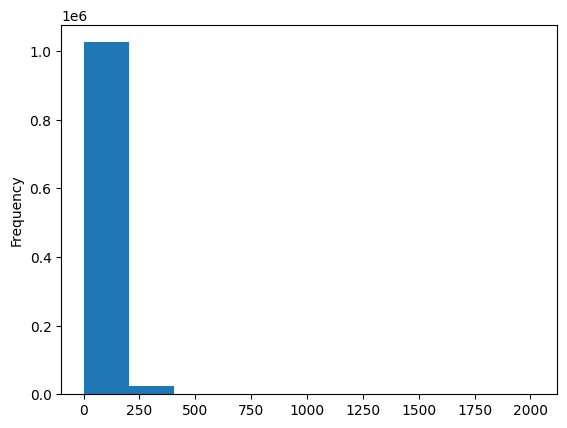

In [36]:
Air_Traffic_Data.Total.plot.hist()

In [37]:
Air_Traffic_Data[Air_Traffic_Data.Total<250].shape[0]

1037465

In [38]:
Air_Traffic_Data[Air_Traffic_Data.Total==250].shape[0]

130

In [39]:
Air_Traffic_Data_2 = Air_Traffic_Data.drop('Total',axis=1)
Air_Traffic_Data_2.head()

,Year,Month,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,usg_apt_encoded,fg_apt_encoded,carrier_encoded,type_encoded
0,2006,5,5,13162,844,20177,1,0,10,385,835,536,0
1,2009,4,34,16321,486,19790,1,54,0,61,1755,246,0
2,2003,5,1,13856,736,20007,1,0,15,39,1038,94,0
3,2005,2,36,14849,275,20355,1,8,0,180,1291,680,0
4,2004,1,22,11625,303,19535,0,30,0,478,457,162,0


<Axes: title={'center': 'Correlation With Total Column'}>

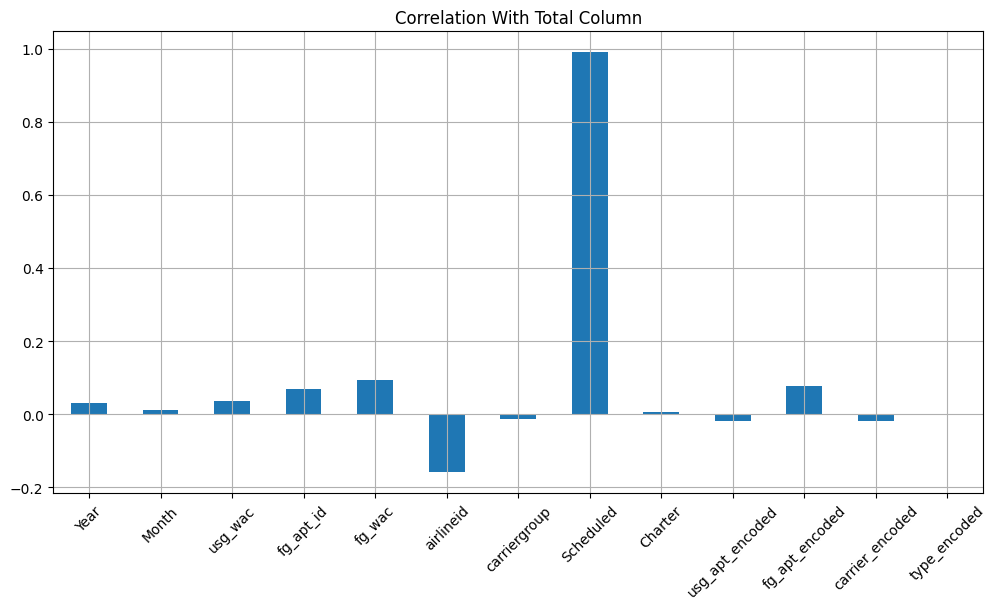

In [40]:
Air_Traffic_Data_2.corrwith(Air_Traffic_Data['Total']).plot.bar(figsize=(12,6),title='Correlation With Total Column',rot=45,grid=True)

In [41]:
corr=Air_Traffic_Data.corr()

<Axes: >

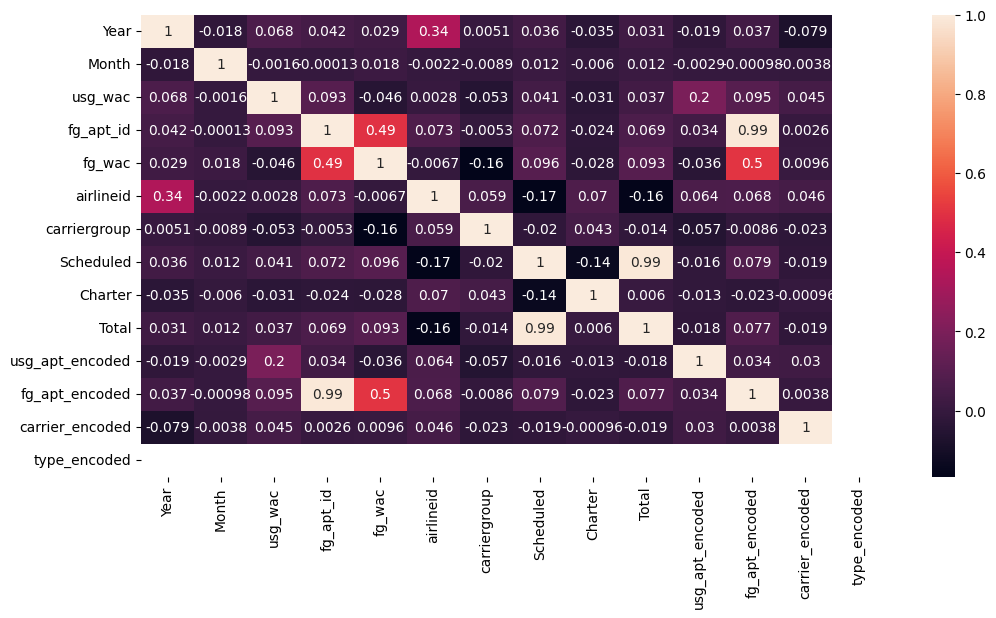

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

# **Train-test-split**

In [43]:
x=Air_Traffic_Data.drop('Total',axis=1)
y=Air_Traffic_Data['Total']

In [44]:
from sklearn.model_selection import train_test_split

# Define features
x = Air_Traffic_Data.drop(['Total'], axis=1)

# Define target
y = Air_Traffic_Data['Total']

# Split training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
x_train.shape

(841033, 13)

In [46]:
x_test.shape

(210259, 13)

In [47]:
y_train.shape

(841033,)

In [48]:
y_test.shape

(210259,)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [50]:
x_train

array([[ 0.01892444,  1.03694549, -1.43966757, ...,  0.77397012,
         0.6393713 ,  0.        ],
       [-0.29713618, -0.70126669,  0.73152452, ...,  1.48453071,
         0.54799842,  0.        ],
       [ 0.22963152, -1.57037279, -0.78830994, ...,  1.53062112,
        -1.18351772,  0.        ],
       ...,
       [ 0.01892444,  0.45754143, -0.75212341, ..., -1.63809499,
        -0.73579059,  0.        ],
       [-0.82390389, -0.99096872, -0.75212341, ...,  0.6088128 ,
         1.29268742,  0.        ],
       [-0.40248972,  0.1678394 ,  1.7447475 , ..., -0.28610945,
        -0.94137958,  0.        ]])

In [51]:
x_test

array([[-0.82643815, -0.98895593,  0.76341066, ..., -1.13811256,
         1.31030518,  0.        ],
       [ 0.22744444,  1.0369098 ,  0.72728873, ..., -1.13811256,
         1.15029609,  0.        ],
       [-0.51027337, -1.27836532,  1.12462994, ...,  0.00823818,
        -1.03954262,  0.        ],
       ...,
       [-0.61566163, -1.56777471, -1.51227078, ..., -0.45145616,
         0.24053011,  0.        ],
       [ 0.75438574,  1.0369098 , -0.78983223, ..., -0.32066446,
        -0.80181482,  0.        ],
       [ 0.96516226,  0.74750041,  1.12462994, ...,  0.28136201,
         0.40511089,  0.        ]])

# **Using LinearRegression To Train the Model**

In [52]:
# Import evaluation metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [53]:
# Step 2:Instantiate your linear regression model
model = LinearRegression()

In [54]:
# Step 3: Train the model on the training set
model.fit(x_train, y_train)

LinearRegression()

In [55]:
# Step 4: Make predictions on the test set
y_pred = model.predict(x_test)

In [56]:
# Step 5: Evaluate model
training_score = (model.score(x_train, y_train)*100).round(2)
test_score = (r2_score(y_test, y_pred)*100).round(2)

print('Training score: {}%'.format(training_score))
print('Test score: {}%'.format(test_score))

Training score: 100.0%
Test score: 99.98%


In [57]:
# Function to automate model training, testing, and evaluation
def build_model(model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, show_plot_y=True):
    """
    Function that trains a model, makes prediction on test set, and evaluates model
    It also compares the predicted values with the ground truth on a plot and shows this comparison in a table

    model - Instantiated training algorithm
    X_train - features in training set
    X_test - test features
    y_train - target variable in training set
    y_test - test target
    show_plot_y - bool default=True
        plot that shows a comparison of the predicted vs actual target variables.

    """
    # fit the training data
    model.fit(x_train, y_train)

    # Make Prediction
    y_pred = model.predict(x_test)

    # Evaluate model
    training_score = (model.score(x_train, y_train)*100).round(2)
    test_score = (r2_score(y_test, y_pred)*100).round(2)

    print('Training score: {}%'.format(training_score))
    print('Test score: {}%'.format(test_score))

    # Create a dataframe of y_test and y_pred
    comparison_df = pd.DataFrame({'y_actual': y_test, 'y_pred': y_pred})

    # print samples to see our model prediction
    print('\n')
    print(comparison_df.head(5))
    print('\n')

    # Plot a graph comparing the predicted values to the actual values
    # Set to False by default but if user specifies True, then show plot
    if show_plot_y == True:
        fig, ax = plt.subplots(figsize=(8, 6))

        """plt.plot(y_pred, label='Predicted Values')
        plt.plot(y_test.values, label='Actual Values')
        # recall that values in a data frame are stored in a dictionary key-value pair"""

        num_points = 20
        plt.plot(y_pred[:num_points], label='Predicted Values')
        plt.plot(y_test.values[:num_points], label='Actual Values')

        plt.ylabel('Total')

        plt.legend()
        plt.show()

    return {'training_score': training_score, 'test_score': test_score}

In [58]:
# Instantiate a dictionary for holding model evaluation scores
model_dic ={}

# This dictionary will have model names assigned as key
# The dictionary value will be equal to the list returned from the build_model function.

In [59]:
def result_scores():
    """
    This function consists of a for loop that iterates over the dictionary: model_dic
    to print out model name and evaluation scores.

    """
    for key in model_dic:
        # Print model name
        print('Model:', key )

        # Print model training score
        print('Training score is {}%'.format(model_dic[key]['training_score']))

        # Print model test score
        print('Test score is {}%'.format(model_dic[key]['test_score']))

        print('\n')

Training score: 100.0%
Test score: 99.98%


        y_actual      y_pred
677069         8    8.702147
160953        18   18.176613
31413          1    1.421475
767246       124  122.970768
982190         4    4.541763




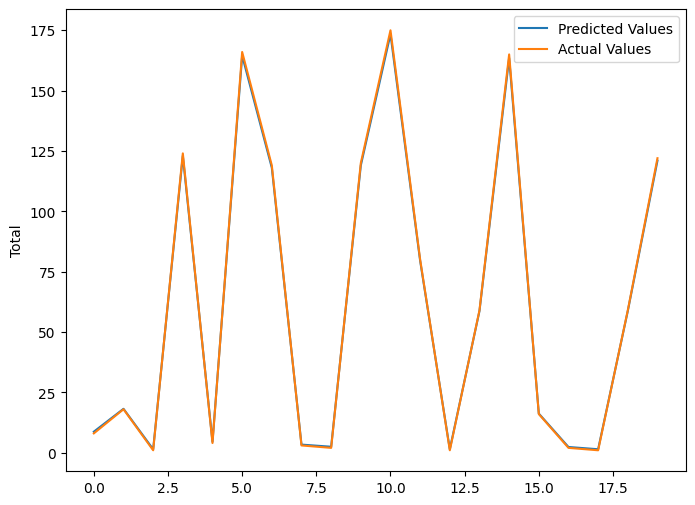

In [60]:
# Build simple linear regression Model

#Import algorithm
from sklearn.linear_model import LinearRegression

#Instantiate model
SLR_model = LinearRegression()

# Use function to build model
model_dic['SLR_model'] = build_model(model=SLR_model)

Training score: 94.02%
Test score: 93.75%


        y_actual      y_pred
677069         8    9.128621
160953        18    9.128621
31413          1    9.128621
767246       124  119.399686
982190         4    9.128621




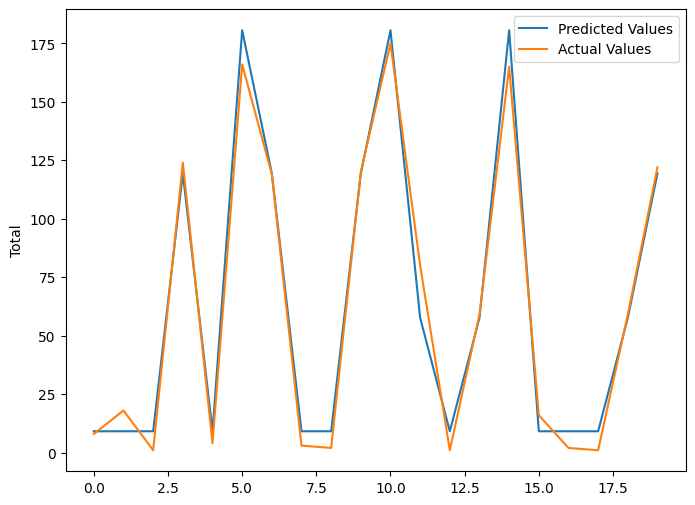

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth= 5, max_leaf_nodes= 7, min_samples_leaf = 1, min_samples_split = 2)

model_dic['Tree_model'] = build_model(model=tree_model)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training score: 99.74%
Test score: 99.2%


        y_actual      y_pred
677069         8    9.281975
160953        18   17.995848
31413          1    2.280051
767246       124  124.056526
982190         4    5.336647




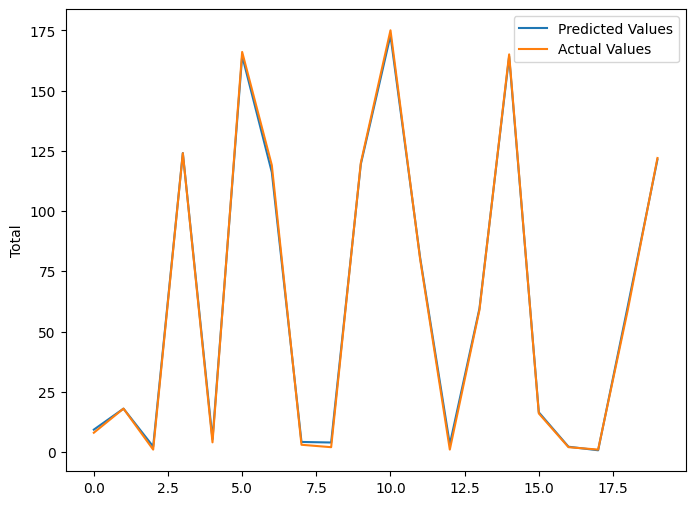

In [62]:
# Build Support Vector Regression model

# Import training algorithm
from sklearn.svm import SVR

# Instantiate model
SVR_model = SVR(C=100, epsilon=0.1, max_iter=10000)

# Build model
model_dic[SVR_model] = build_model(model=SVR_model)